# Stoich45 Model Analysis

Deciding which feature set is better out of PCA-based features and intersection based features

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import time
import seaborn as sns


In [4]:
# PCA feature set

pca_df = pd.read_csv('Stoich45_PCA_dataset.csv')
pca_df

,0,1,2,3,4,5,6,7,outputs.hse06.bandgap,MOF
0,-4.307243,-0.675081,-1.699228,0.251383,0.037525,-0.232746,1.626041,-0.089741,3.751390,qmof-0000295
1,2.968017,5.844938,7.762437,-3.366061,1.862054,-0.491276,-1.075109,0.422786,3.014584,qmof-000512e
2,-1.512710,1.450255,-0.367809,-2.149871,0.786003,0.144041,-0.260081,-0.407093,3.284171,qmof-00052d0
3,-3.060303,-0.366641,-1.862870,-0.043417,-0.726981,-1.471302,-0.445387,-0.351521,5.170849,qmof-0006638
4,-2.280525,-2.179344,0.191111,-0.418365,-0.204421,-0.338515,1.133028,-0.218978,3.978235,qmof-002580c
...,...,...,...,...,...,...,...,...,...,...
8349,3.552997,0.582928,0.199021,-1.736608,1.168030,2.582360,0.083573,-1.136015,3.030492,qmof-ffe63dd
8350,1.288160,4.360262,-1.739418,-2.324693,0.880300,-0.636727,-0.357011,0.001229,4.483906,qmof-ffeae31
8351,3.574325,-2.538826,0.273596,-1.195941,1.655407,-0.468603,-1.515451,0.410653,3.510606,qmof-ffeef76
8352,-0.393199,-2.688377,0.899968,-0.433517,0.599756,-0.971308,-0.401476,-0.578822,4.055379,qmof-fff4e91


In [5]:
int_df = pd.read_csv('Stoich45_FeatureSelected_dataset.csv')
int_df

,atomic_num_standard_deviation,atomic_num_max,group_num_mean,period_num_mean,electronegativity_min,electron_affinity_mean,electron_affinity_geometric_mean,electron_affinity_standard_deviation,melting_mean,melting_geometric_mean,...,density_geometric_mean,density_standard_deviation,density_max,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min,outputs.hse06.bandgap,MOF
0,5.689851,29.0,7.960000,1.600000,1.90,100.252000,82.167123,45.559861,1143.143600,107.487344,...,4.182460,1912.665927,8960.0,1233.652000,1223.402105,146.933016,1402.3,745.5,3.751390,qmof-0000295
1,3.088689,19.0,13.700000,2.050000,0.82,110.030000,72.816144,57.821122,1199.022000,206.066393,...,15.205775,1023.803409,2260.0,1218.510000,1187.405501,219.174061,1402.3,418.8,3.014584,qmof-000512e
2,6.272068,30.0,10.363636,1.818182,1.65,100.818182,0.000000,58.491030,1114.843636,141.329527,...,8.874182,1680.181346,7140.0,1230.522727,1221.752785,142.324105,1402.3,906.4,3.284171,qmof-00052d0
3,8.169828,48.0,8.687500,1.656250,1.69,110.787500,0.000000,42.372240,1231.431562,122.519183,...,5.589511,1726.258029,8650.0,1228.065625,1221.424040,122.525772,1313.9,867.8,5.170849,qmof-0006638
4,4.436880,27.0,9.097561,1.658537,1.88,104.460976,82.484786,49.421674,1552.056341,186.153480,...,10.509249,1648.227778,8900.0,1219.541463,1210.807020,139.686543,1402.3,760.4,3.978235,qmof-002580c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,6.968540,29.0,11.352941,2.000000,1.90,121.117647,67.620679,100.512201,1467.541765,253.964277,...,17.891800,2183.677437,8960.0,1213.182353,1199.398347,171.503666,1402.3,745.5,3.030492,qmof-ffe63dd
8350,11.575955,48.0,11.185185,2.000000,1.69,93.111111,0.000000,62.259852,935.485926,130.152404,...,8.712412,2311.005049,8650.0,1234.559259,1223.359359,158.253641,1402.3,867.8,4.483906,qmof-ffeae31
8351,8.317703,48.0,10.903226,1.903226,1.69,102.548387,0.000000,64.328877,1786.626452,330.048989,...,40.085683,1712.755584,8650.0,1193.154839,1183.393508,151.921017,1402.3,867.8,3.510606,qmof-ffeef76
8352,5.857798,30.0,9.739130,1.739130,1.65,116.756522,0.000000,44.348843,1706.767826,241.158462,...,19.449685,1662.683156,7140.0,1196.652174,1189.732816,126.320937,1313.9,906.4,4.055379,qmof-fff4e91


# Evaluation Criteria

- Predictive Performance: How well the features help in achieving the target task --> Regression accuracy

- Interpretability: Whether the features make sense and provide insights.

- Computational Efficiency: Training time and complexity.


# Train Models on each Feature Set

Load and preprocess

In [9]:
# Extract the target variable
y = pca_df['outputs.hse06.bandgap']

# Drop target from feature set
X_pca = pca_df.drop(columns=['outputs.hse06.bandgap', 'MOF'])
X_int = int_df.drop(columns=['outputs.hse06.bandgap', 'MOF'])

# Standardize features
scaler_pca = StandardScaler()
scaler_int = StandardScaler()

X_pca = scaler_pca.fit_transform(X_pca)
X_int = scaler_int.fit_transform(X_int)

Split data into Train, Validation, and Test Sets

In [10]:
seed = 1234

# Split into 80% train and 20% temporary (val+test)
X_pca_train, X_pca_temp, y_train, y_temp = train_test_split(
    X_pca, y, test_size=0.2, random_state=seed
    )
X_int_train, X_int_temp, _, _ = train_test_split(
    X_int, y, test_size=0.2, random_state=seed)

# Split the remaining 20% into 10% validation and 10% test
X_pca_val, X_pca_test, y_val, y_test = train_test_split(
    X_pca_temp, y_temp, test_size=0.5, random_state=seed
    )
X_int_val, X_int_test, _, _ = train_test_split(
    X_int_temp, y_temp, test_size=0.5, random_state=seed
    )

Train Regression Models & Evaluate Performance

In [12]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    """Train model and evaluate performance."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    
    return rmse, r2

# Initialize model
model_pca = RandomForestRegressor(n_estimators=100, random_state=seed)
model_int = RandomForestRegressor(n_estimators=100, random_state=seed)

# Evaluate PCA-based features
rmse_pca, r2_pca = evaluate_model(model_pca, X_pca_train, y_train, X_pca_val, y_val)
print(f"PCA Features - RMSE: {rmse_pca:.4f}, R²: {r2_pca:.4f}")

# Evaluate Intersection-based features
rmse_int, r2_int = evaluate_model(model_int, X_int_train, y_train, X_int_val, y_val)
print(f"Intersection Features - RMSE: {rmse_int:.4f}, R²: {r2_int:.4f}")

PCA Features - RMSE: 0.7684, R²: 0.4930
Intersection Features - RMSE: 0.7063, R²: 0.5716


Test Model on Test Set

In [ ]:
y_test_pred_pca = model_pca.predict(X_pca_test)
y_test_pred_int = model_int.predict(X_int_test)

rmse_test_pca = np.sqrt(mean_squared_error(y_test, y_test_pred_pca))
r2_test_pca = r2_score(y_test, y_test_pred_pca)

rmse_test_int = np.sqrt(mean_squared_error(y_test, y_test_pred_int))
r2_test_int = r2_score(y_test, y_test_pred_int)

print(f"Test Performance - PCA Features: RMSE: {rmse_test_pca:.4f}, R²: {r2_test_pca:.4f}")
print(f"Test Performance - Intersection Features: RMSE: {rmse_test_int:.4f}, R²: {r2_test_int:.4f}")

Test Performance - PCA Features: RMSE: 0.7977, R²: 0.4565
Test Performance - Intersection Features: RMSE: 0.7511, R²: 0.5181


Compare Training Time

In [15]:
start = time.time()
model_pca.fit(X_pca_train, y_train)
end = time.time()
print(f"PCA Training Time: {end - start:.2f} seconds")

start = time.time()
model_int.fit(X_int_train, y_train)
end = time.time()
print(f"Intersection Features Training Time: {end - start:.2f} seconds")

PCA Training Time: 5.50 seconds
Intersection Features Training Time: 12.41 seconds


Interpretability Check

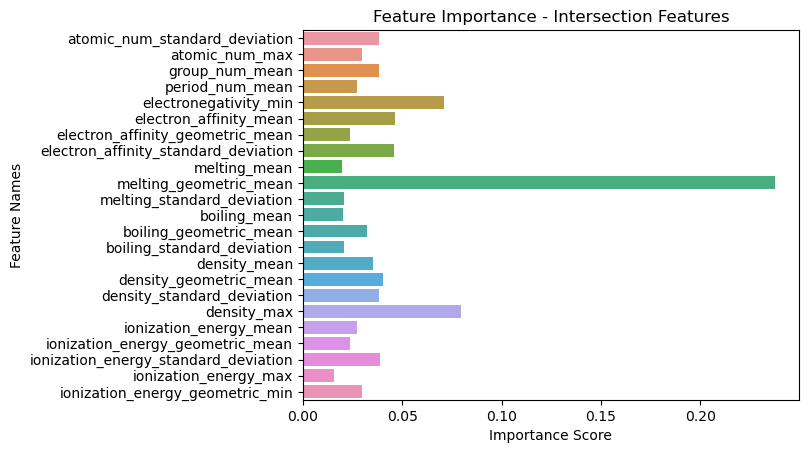

In [21]:
# Feature importances from RandomForest
feature_importances = model_int.feature_importances_

# Plot importance
sns.barplot(x=feature_importances, y=int_df.drop(columns=['outputs.hse06.bandgap', 'MOF']).columns[:])
plt.xlabel("Importance Score")
plt.ylabel("Feature Names")
plt.title("Feature Importance - Intersection Features")
plt.show()